Python Project - Marvel Mart Project  
Kyle Bailey  
3/14/2021

In [1]:
# import statements
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

Part 1: Cleaning the Data

In [2]:
# importing MM_Sales.csv as sales
sales = pd.read_csv('Data/MM_Sales.csv')

# visualizing the layout of the database
display(sales.head())

# testing for missing data in each column
sumNA = sales.isna().sum()
print(sumNA)

salesClean = sales.copy() # saving a new variable for final cleaned data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250


Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


Countries

In [3]:
iC = []

print('\nTesting for erronous data in Country')
for i, row in salesClean.iterrows():
# try to convert each Country item as a float, if it fails, it is a string of words
    try:
        row.loc['Country'] = float(row.loc['Country'])
        if type(row.loc['Country']) == float:
            iC.append(i)
    except:
        0 == 0
        
print(f'Number of erronous countries {len(iC)}')

# know the index of erronous data so can replace with null value
for i in iC:
    salesClean.replace(salesClean['Country'][i], 'NULL', inplace = True)


Testing for erronous data in Country
Number of erronous countries 3


Item Type

In [4]:
# replacing na values in Item Type with null value
salesClean['Item Type'] = salesClean['Item Type'].fillna('NULL')

Order Priority

In [5]:
# replacing na balues in Order Priority with null value
salesClean['Order Priority'] = salesClean['Order Priority'].fillna('NULL')

Order ID

In [6]:
iO = []

print('\nTesting for erronous data in Order ID')
for i, row in salesClean.iterrows():
# test to see if rows are letters, if it fails it is numeric
    try:
        if row['Order ID'].isalpha():
            iO.append(i)
    except:
        1 == 1
    
print(f'Number of erronous IDs {len(iO)}')

# know the index of erronous data so can replace with null value
for i in iO:
    salesClean.replace(salesClean['Order ID'][i], 'NULL', inplace = True)


Testing for erronous data in Order ID
Number of erronous IDs 5


In [7]:
# testing for missing data in each column
sumNAC = salesClean.isna().sum()
print(sumNAC)

# testing data to see if any unwanted values remain in cleaned data
print(salesClean['Country'].unique())
print(salesClean['Item Type'].unique())
print(salesClean['Order Priority'].unique())
print(salesClean['Order ID'].unique())

# save salesClean to a new csv file
salesClean.to_csv('Data/MM_Sales_clean.csv')

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64
['Namibia' 'Iceland' 'Russia' 'Moldova ' 'Malta' 'Indonesia' 'Djibouti'
 'Greece' 'Cameroon' 'Nigeria' 'Senegal' 'Afghanistan' 'India' 'Lebanon'
 'Turkey' 'Iraq' 'Rwanda' 'Ukraine' 'Finland' 'South Sudan'
 'Antigua and Barbuda ' 'Kuwait' 'United Kingdom' 'Saint Kitts and Nevis '
 'Saint Lucia' 'Tunisia ' 'Yemen' 'Guinea' 'Tuvalu' 'South Korea'
 'San Marino' 'Trinidad and Tobago' 'Kosovo' 'Hungary' 'Botswana' 'Serbia'
 'Guatemala' 'United Arab Emirates' 'Samoa ' 'Bahrain'
 'Saint Vincent and the Grenadines' 'Pakistan' 'Poland' 'Lithuania'
 'Sudan' 'Portugal' 'Fiji' 'Tanzania' 'Sao Tome and Principe' 'Cape Verde'
 'Greenland' 'Guinea-Bissau' 'Georgia' 'Jamaica' 'Bulgaria' 'Kazakhstan'
 'Grenada' 'Hon

Part 2: Exploratory Data Analysis with Reports & Visualizations

Question 1

Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          315
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
France                              303
Name: Country, dtype: int64


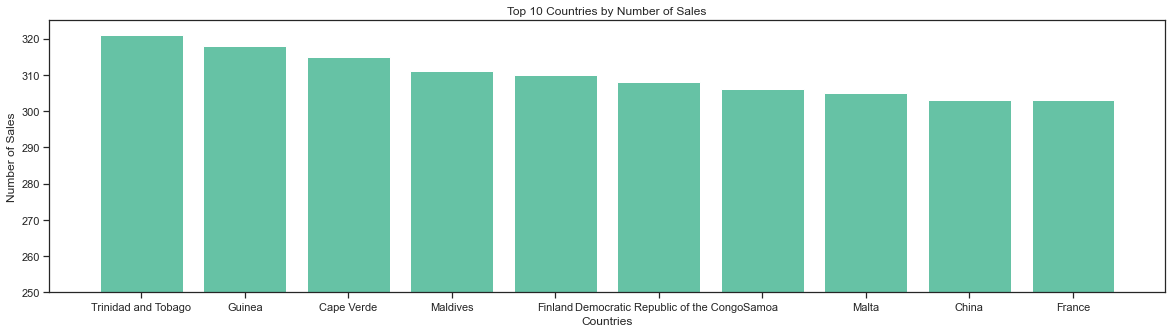

In [8]:
# create lists for each column to turn into a dictionary
RegionL = []
for i in salesClean['Region']:
    RegionL.append(i)
CountryL = []
for i in salesClean['Country']:
    CountryL.append(i)
ItemTypeL = []
for i in salesClean['Item Type']:
    ItemTypeL.append(i)
SalesChannelL =[]
for i in salesClean['Sales Channel']:
    SalesChannelL.append(i)
OrderPriorityL = []
for i in salesClean['Order Priority']:
    OrderPriorityL.append(i)
OrderDateL = []
for i in salesClean['Order Date']:
    OrderDateL.append(i)
OrderIDL = []
for i in salesClean['Order ID']:
    OrderIDL.append(i)
ShipDateL = []
for i in salesClean['Ship Date']:
    ShipDateL.append(i)
UnitSoldL = []
for i in salesClean['Units Sold']:
    UnitSoldL.append(i)
UnitPriceL = []
for i in salesClean['Unit Price']:
    UnitPriceL.append(i)
UnitCostL = []
for i in salesClean['Unit Cost']:
    UnitCostL.append(i)
TotalRevenueL = []
for i in salesClean['Total Revenue']:
    TotalRevenueL.append(i)
TotalCostL = []
for i in salesClean['Total Cost']:
    TotalCostL.append(i)
TotalProfitL = []
for i in salesClean['Total Profit']:
    TotalProfitL.append(i)

# combine lists with column values to make dataframe from the dictionary with all values
newDict = pd.DataFrame({'Region': RegionL,
                   'Country': CountryL,
                   'Item Type': ItemTypeL,
                   'Sales Channel': SalesChannelL,
                   'Order Priority': OrderPriorityL,
                   'Order Date': OrderDateL,
                   'Order ID': OrderIDL,
                   'Ship Date': ShipDateL,
                   'Units Sold': UnitSoldL,
                   'Unit Price': UnitPriceL,
                   'Unit Cost': UnitCostL,
                   'Total Revenue': TotalRevenueL,
                   'Total Cost': TotalCostL,
                   'Total Profit': TotalProfitL})

# get the count of sales of the top 10 countries 
sales = (newDict['Country'].value_counts().head(n=10))
print(sales)

# 1.1 create a chart to show top 10 countries from most to lease
plt.figure(figsize=(20, 5))
plt.bar(sales.index, sales.values)
plt.ylim(250, 325)
plt.title('Top 10 Countries by Number of Sales')
plt.xlabel('Countries')
plt.ylabel('Number of Sales')
plt.show()

# 1.2 open MM_Rankings.txt and append values from the sales dictionary above
with open('Data/MM_Rankings.txt', 'a+') as writer:
    writer.write('\nCountries Most Sales Transactions: \n')    
    for k,v in sales.items():
        writer.write(f"{k}: {v}\n")  
    writer.write(f'The country we should build our shipping center is Cape Verde because it is the highest ranked country by sales that does not have a shipping center. Trinidad and Tobago, Guinea, and the Maldives are ranked 1,2, and 4 with centers. Cape Verde is ranked 3 with no center.\n')

Question 2

Online     30204
Offline    19796
Name: Sales Channel, dtype: int64
M    19887
H    15099
L     9986
C     5013
Name: Order Priority, dtype: int64


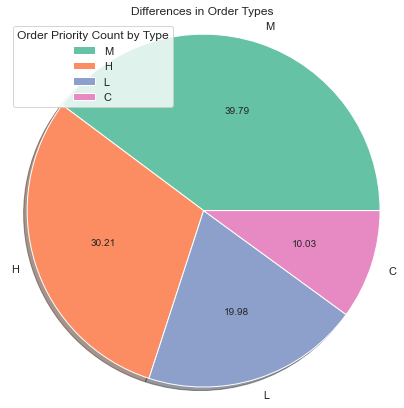

In [9]:
# 2.1 create a new dataframe containing sales channel counts by each type
salesC = (newDict['Sales Channel'].value_counts())
print(salesC)

# 2.2 create a new dataframe containing order priority counts by each type
OrderP = (newDict['Order Priority'].value_counts().head(n=4))
print(OrderP)

# 2.3 create a pie chart to show differences in values
plt.figure(figsize=(7, 7))
plt.pie(OrderP, labels=OrderP.index, shadow=True, autopct='%.2f')
plt.title('Differences in Order Types')
plt.axis('equal')  # centers pie chart
plt.legend(loc=2, title='Order Priority Count by Type')
plt.show()

# 2.4 save to MM_Rankings.txt by iterating through dictionary keys and values from the salesC dictionary
with open('Data/MM_Rankings.txt', 'a+') as writer:
    writer.write('\nSales Channels: \n')       
    for k,v in salesC.items():
        writer.write(f"{k}: {v}\n")
    writer.write('We have more online than offline sales\n')

# save to MM_Rankings.txt by iterating through dictionary keys and values from the OrderP dictionary
with open('Data/MM_Rankings.txt', 'a+') as writer:  
    writer.write('\nOrder Priorities: \n')        
    for k,v in OrderP.items():
        writer.write(f"{k}: {v}\n")
    writer.write('We do more M order priorities\n')

Question 3

         Item Type   Total Profit
0        Baby Food 1944985596.160
1        Beverages  327751882.740
2           Cereal 1824726412.290
3          Clothes 1521740766.240
4        Household 3403301844.870
5             NULL 6041190914.560
6  Office Supplies 2605583355.000
7    Personal Care  535394370.000
8       Vegetables 1323261806.390


         Item Type   Total Profit
0             NULL 6041190914.560
1        Household 3403301844.870
2  Office Supplies 2605583355.000


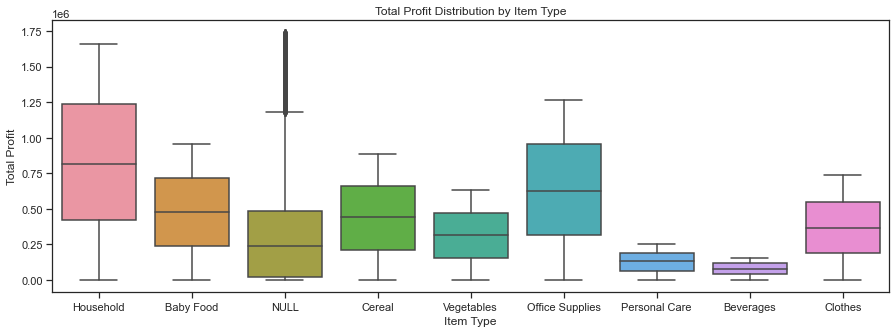

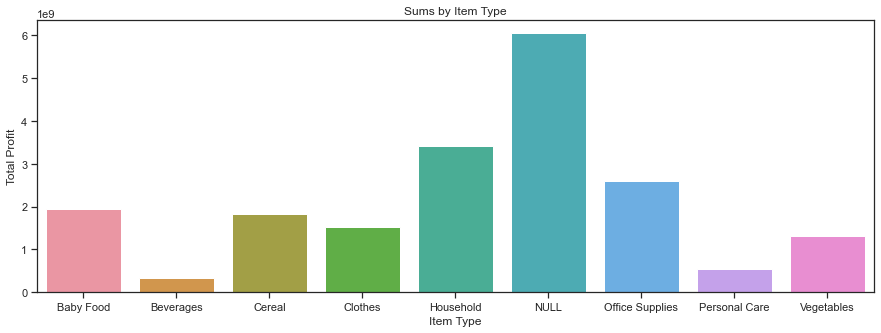

In [10]:
# 3.1 create a boxplot for total profits distribution by item type
plt.figure(figsize=(15,5))
ax = sns.boxplot(x='Item Type',y='Total Profit',data=salesClean)
ax.set_title('Total Profit Distribution by Item Type')

# 3.2 use Python to determine the sum of Total Profit by Item Type.
profitByType = salesClean.groupby(['Item Type'])['Total Profit'].sum()
profitDF = pd.DataFrame(profitByType).reset_index()
profitDF.columns = ['Item Type', 'Total Profit']
print(profitDF)
print("\n")

# 3.3 now create a chart type of your choice (Seaborn or Matplotlib) showing the sums of the different Item Types.
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Item Type',y='Total Profit',data=profitDF)
ax.set_title('Sums by Item Type')

# 3.4 now, using Python, rank the top 3 item types we did the most sales (brought in most profit) in to the least sales. (Use 'Total Profit' to determine this)
profitByType = salesClean.groupby(['Item Type'])['Total Profit'].sum().nlargest(3)
profitDF = pd.DataFrame(profitByType).reset_index()
profitDF.columns = ['Item Type', 'Total Profit']
print(profitDF)

# create a dictionary with values from profitDF
TypeL = []
for i in profitDF['Item Type']:
    TypeL.append(i)
ProfitL = []
for i in profitDF['Total Profit']:
    ProfitL.append(i)
profitType = {TypeL[i]: ProfitL[i] for i in range(len(ProfitL))} 

# 3.5 add the top 3 results to to MM_Rankings.txt, iterating through above dictionary
with open('Data/MM_Rankings.txt', 'a+') as writer:  
    writer.write('\nHighest Selling Items: \n')        
    for k,v in profitType.items():
        writer.write(f"{k}: {v}\n")
    writer.write('We profited from NULL the most\n')

Discuss the results (3.6):

The boxplots suggest that consumers spend a wide range on items like Household goods and Office Supplies as shows by the large distribution between the upper and lower quartiles. Item types like these should have careful tracking of inventory as due to these ranges in spending habits there can be unpredictable. Further investigation to seasonal or region based trends and preferences could be essential in manganing inventories and better predicting profit trends.

Conversely, items like Personal Care and Beverage types have a seemingly agreed upon amount that is purchased, as there is little range on the boxplot. This is beneficial for an inventory standpoint as consumers will generally purchase consistent amounts.

Question 4

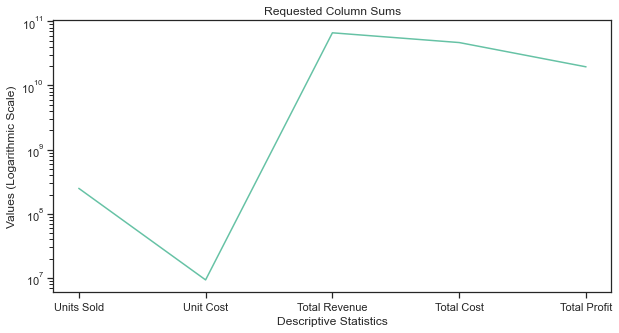

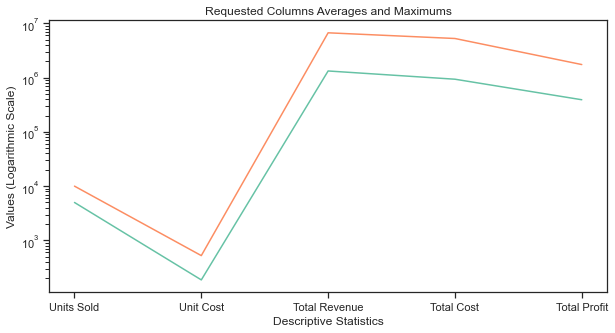

Sums: 



Averages: 



Maximums: 




In [12]:
# define a function calc with parameters heading and values from a dataframe that will save to a new .txt file MM_Calc
def calc(heading, stats):    
    with open('Data/MM_Calc.txt', 'a+') as txt_file:        
        txt_file.write(heading)        
        txt_file.write('\n')        
        for k,v in stats.items(): # loops through dataframe to print final value for each item.            
            txt_file.write(str(k))
            txt_file.write(': ')            
            txt_file.write(str(v))            
            txt_file.write('\n')

# create dataframe containing requried columns for calculations
stats = salesClean[['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']]

# 4.1-4.3 collect sum, average, and max for each column in dataframe
dataSums = stats.sum(axis = 0, skipna = True)
dataAvgs = stats.mean(axis = 0, skipna = True)
dataMax = stats.max(axis = 0, skipna = True)

# 4.4 line plot for Sums of each column
plt.figure(figsize=(10, 5))
plt.plot(dataSums)
plt.title('Requested Column Sums')
plt.yscale('log')
plt.xlabel('Descriptive Statistics')
plt.ylabel('Values (Logarithmic Scale)')
plt.show()

# line plot for Averages and Maximums of each columns
plt.figure(figsize=(10, 5))
plt.plot(dataAvgs)
plt.plot(dataMax)
plt.title('Requested Columns Averages and Maximums')
plt.yscale('log')
plt.xlabel('Descriptive Statistics')
plt.ylabel('Values (Logarithmic Scale)')
plt.show()

# 4.5 print 
print('Sums: ', end = '\n')
calc('Sums: ', dataSums)
print('\n')        

print('\nAverages: ', end = '\n')
calc('Averages: ', dataAvgs)
print('\n')

print('\nMaximums: ', end = '\n')
calc('Maximums: ', dataMax)
print('\n')

Part 3: Cross Reference Statistics

In [13]:
# create a new dataframe for Regions and Countries and a second one filtering for unique regionsa
df = pd.read_csv('Data/MM_Sales_clean.csv')[['Region', 'Country']]
regions = df['Region'].unique()

# create empty dictionary 
crossRef = {}
# loop through dictionary for unique regions
for region in regions:
    crossRef[region] = df[df.Region.eq(region)]['Country'].unique()

#
dataFrames = [pd.DataFrame({key: crossRef[key]}) for key in crossRef.keys()]
# concatenate the dataframe in to columns
dataFrame = pd.concat(dataFrames, axis=1)

#Saving result to a new CSV file
dataFrame.to_csv('Data/Countries_By_Region.csv', index=False)